# Netflix Data Analysis

#### Import Modules

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Import Data

In [7]:
netflix_data = pd.read_csv("./dataset/netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## (01) Evolution of number of Movies and TV Shows over time

In [265]:
netflix_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


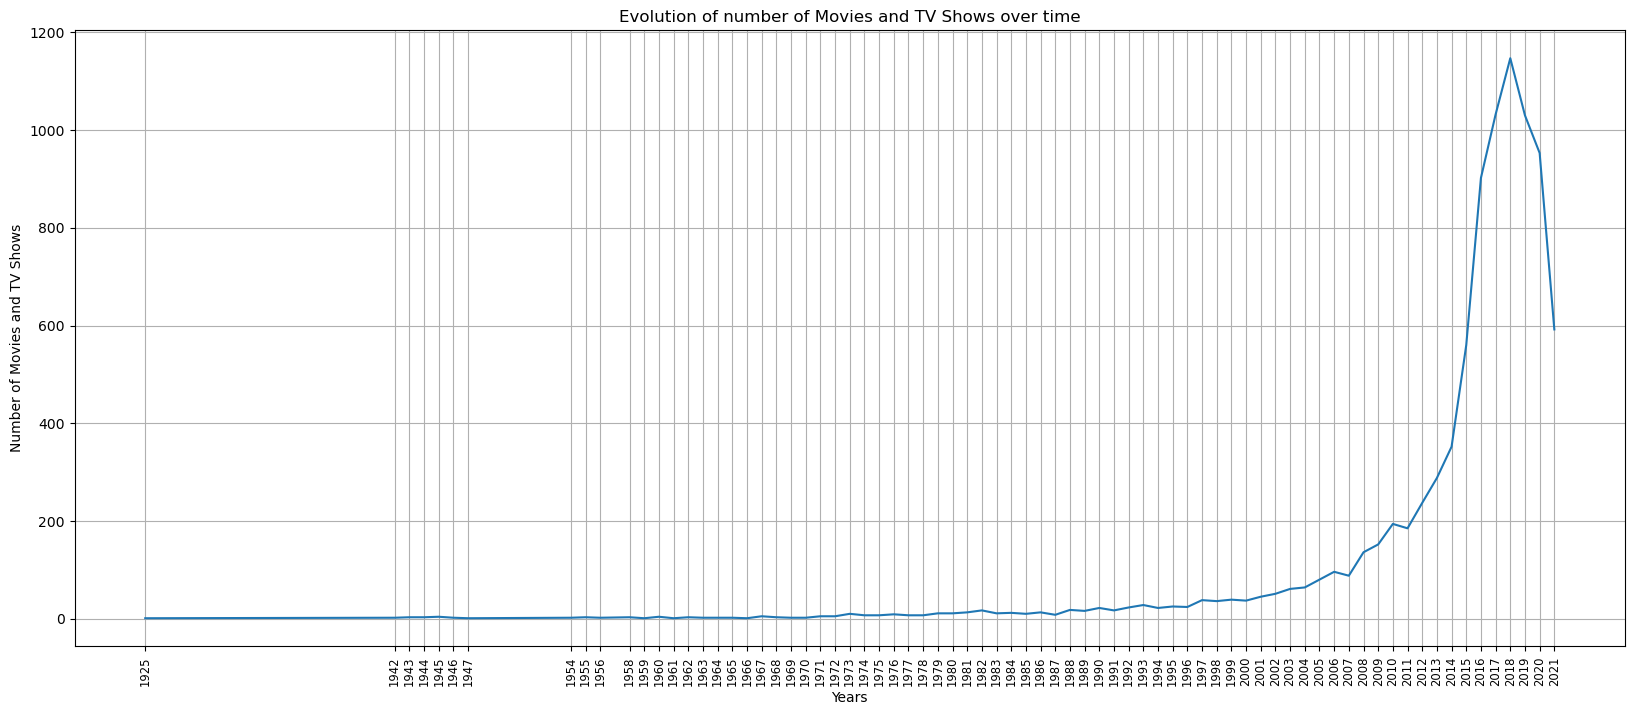

In [266]:
# count the number of movies and tv shows grouping by released years
df = netflix_data.groupby("release_year")["type"].count()

# get the years
years = netflix_data["release_year"].unique()

# plot the graph
df.plot(kind="line", figsize=(20, 8))
plt.xticks(years, rotation="vertical", fontsize="small")
plt.xlabel("Years")
plt.grid()
plt.ylabel("Number of Movies and TV Shows")
plt.title("Evolution of number of Movies and TV Shows over time")

plt.show()

## The country that produces the most content on Netflix

In [267]:
netflix_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [268]:
# get the dataframe by removing the rows with null countries
df_2 = netflix_data[netflix_data.country.notnull()]

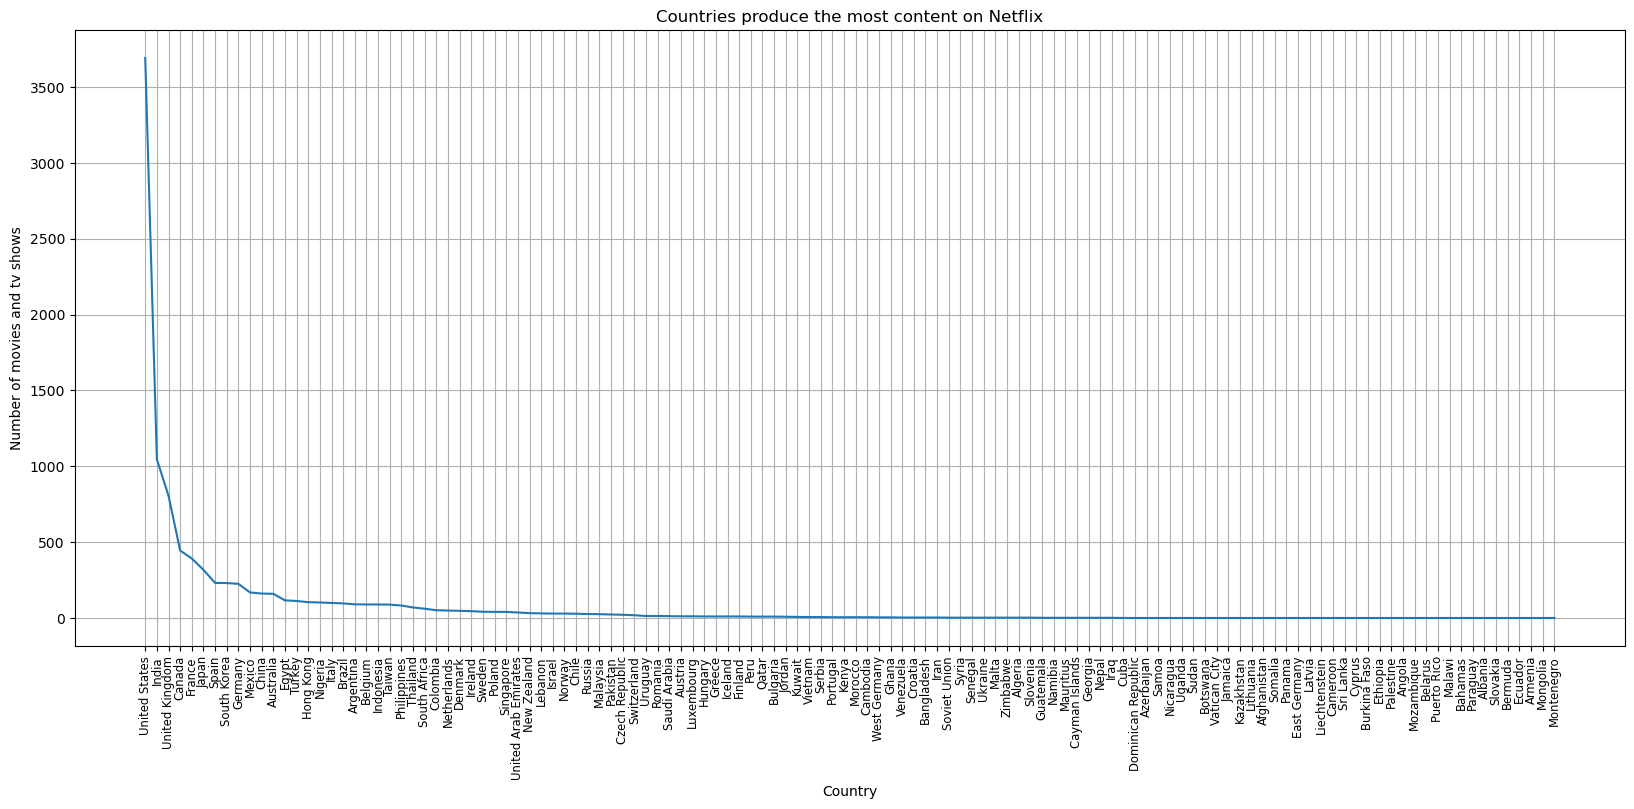

In [269]:
# split the countries into a list
countries = df_2["country"].str.split(",", expand=True).stack()

#remove unwanted white spaces
countries = countries.str.strip()

# remove countries which are just blank spaces
countries = countries[countries != '']

# count the countrues
country_counts = countries.value_counts()

# get the unique list of countries
countries_list = countries.unique().tolist()

# plot the graph
country_counts.plot(kind="line",figsize = (20, 8))
plt.xticks(range(len(country_counts)), country_counts.index, rotation=90, fontsize = 'small')
plt.grid()
plt.xlabel("Country")
plt.ylabel("Number of movies and tv shows")
plt.title("Countries produce the most content on Netflix")

plt.show()

## Number of tv shows and movies produced in a certain year

In [270]:
netflix_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [271]:
# filter the tv shows 
tv_shows = netflix_data[netflix_data.type == "TV Show"]
tv_shows.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [127]:
# group by released year and get the tv show produced per year
tv_shows_per_year = tv_shows.groupby("release_year")["title"].count()

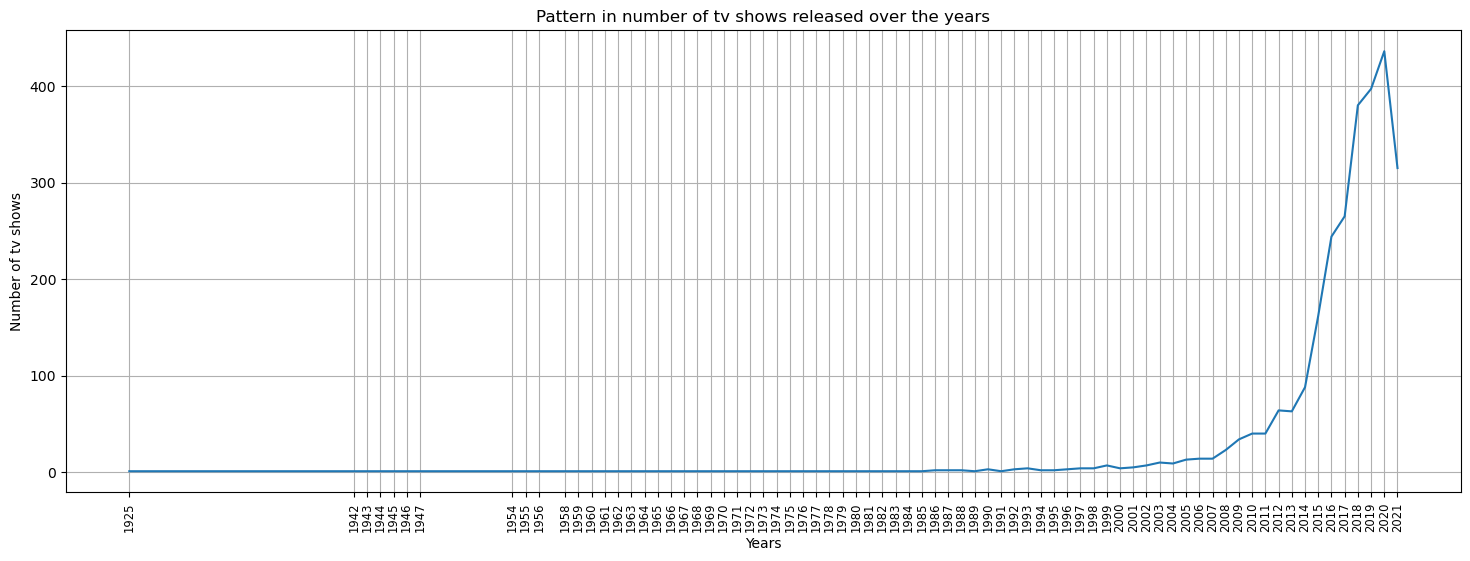

In [272]:
# plot the grapsh
tv_shows_per_year.plot(kind="line", figsize=(18, 6))
plt.xticks(years, rotation="vertical", fontsize="small")
plt.xlabel("Years")
plt.ylabel("Number of tv shows")
plt.title("Pattern in number of tv shows released over the years")
plt.grid()
plt.show()

## Most popular number of seasons for a TV Show

In [273]:
# get the number of seasons
duration = tv_shows.groupby("duration")["title"].count()

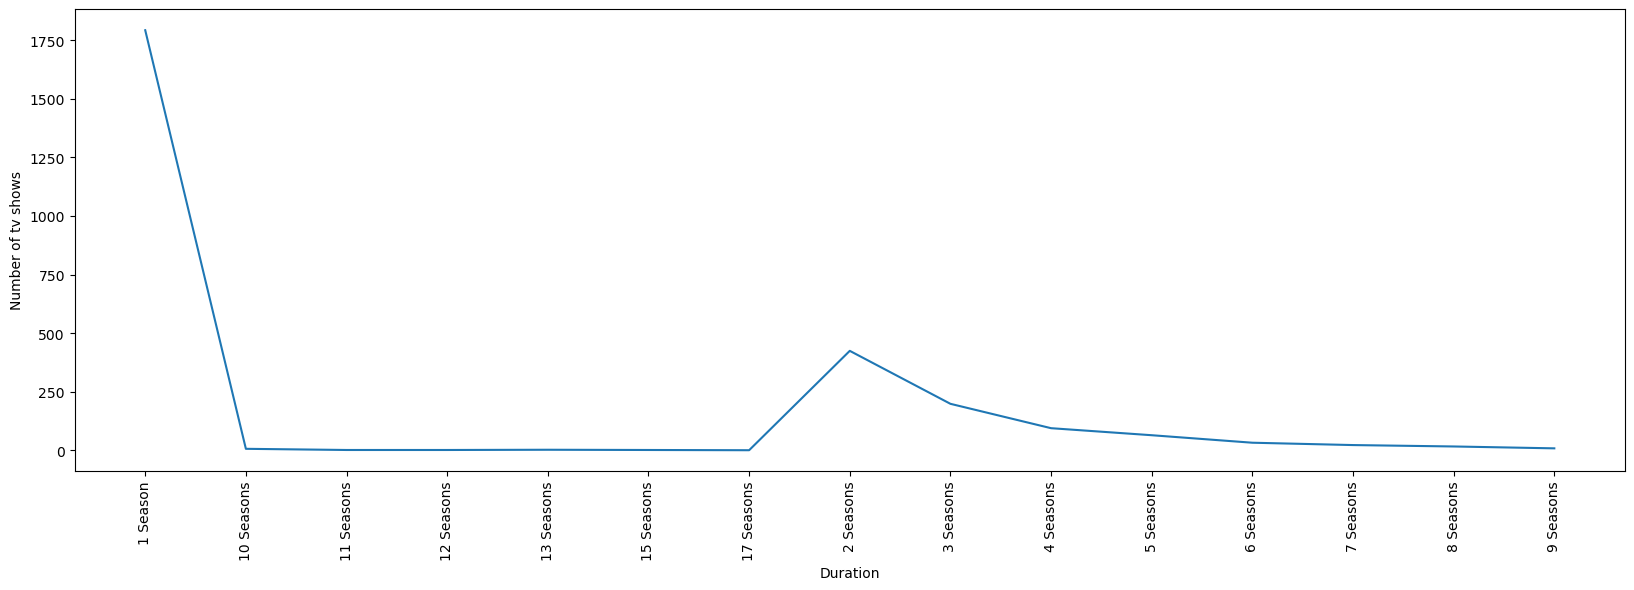

In [275]:
# plot the graph
duration.plot(kind="line", figsize=(20, 6))
plt.xticks(range(len(duration.index)), duration.index, rotation="vertical")
plt.ylabel("Number of tv shows")
plt.xlabel("Duration")
plt.show()


## Most Common Genres in the Netflix Library

In [276]:
# split the genres if they are listed as a string
genres = netflix_data["listed_in"].str.split(",", expand=True)

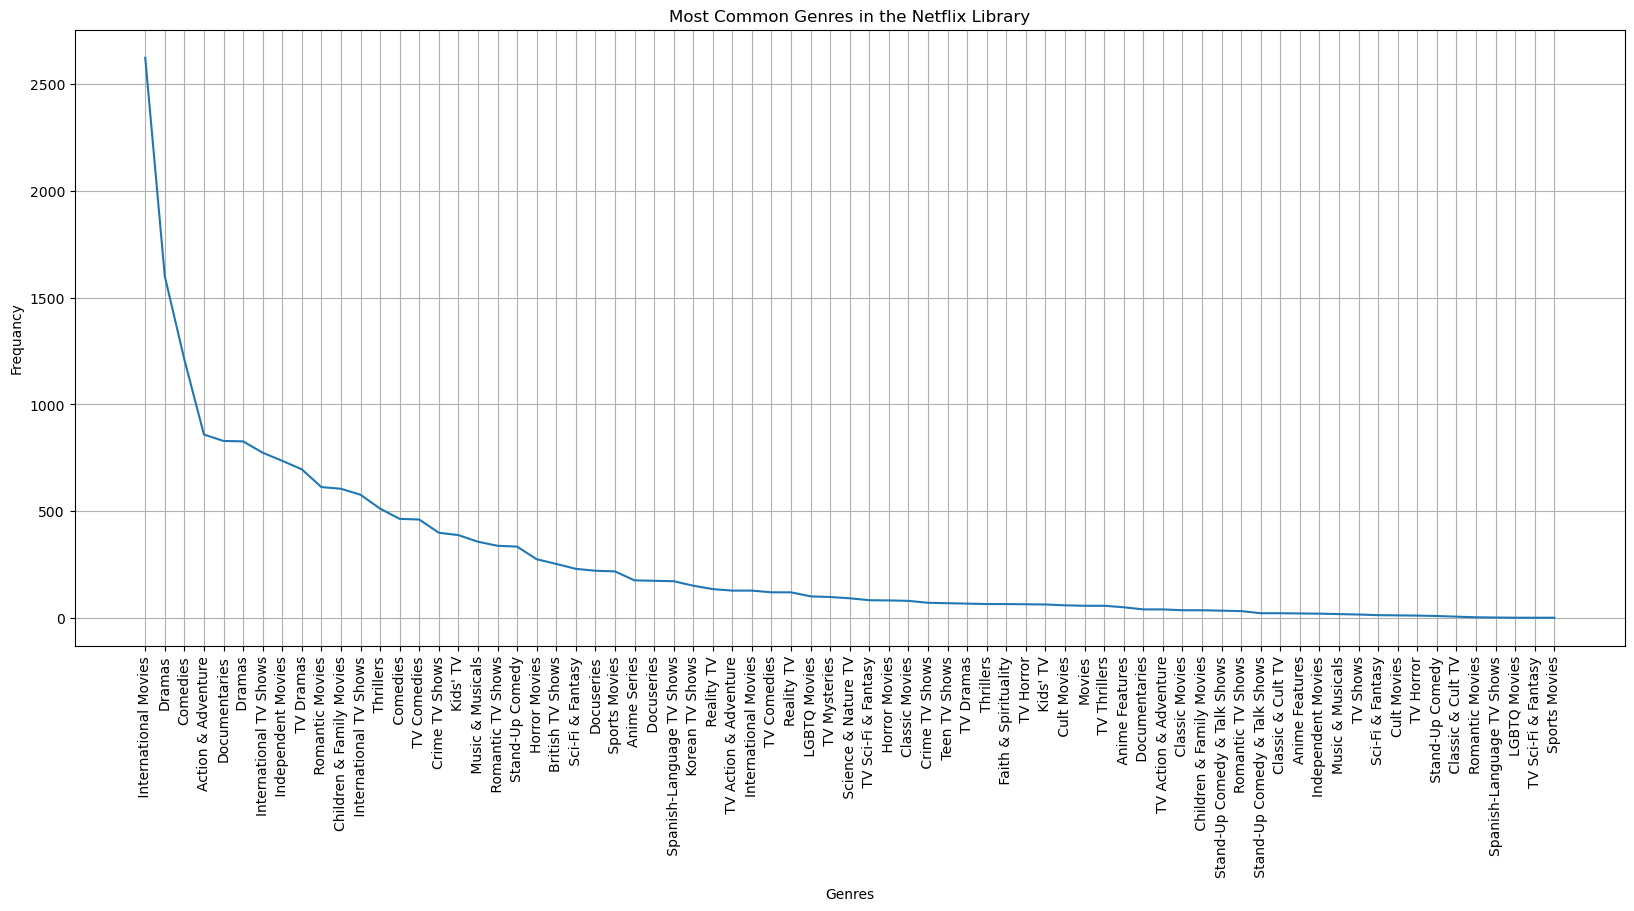

In [279]:
# get the count of genres
genres["total_count"] = genres.count(axis=1)

genre_counts = genres.iloc[:, :-1].stack().value_counts()

most_common_genres = genre_counts.sort_values(ascending=False)

# plot the graph
most_common_genres.plot(kind='line', figsize=(20, 8))
plt.xticks(range(len(genre_counts)), genre_counts.index, rotation="vertical")
plt.grid()
plt.xlabel("Genres")
plt.ylabel("Frequancy")
plt.title("Most Common Genres in the Netflix Library")

plt.show()

## Relationship between Ratings, Number of Movies and Released Years

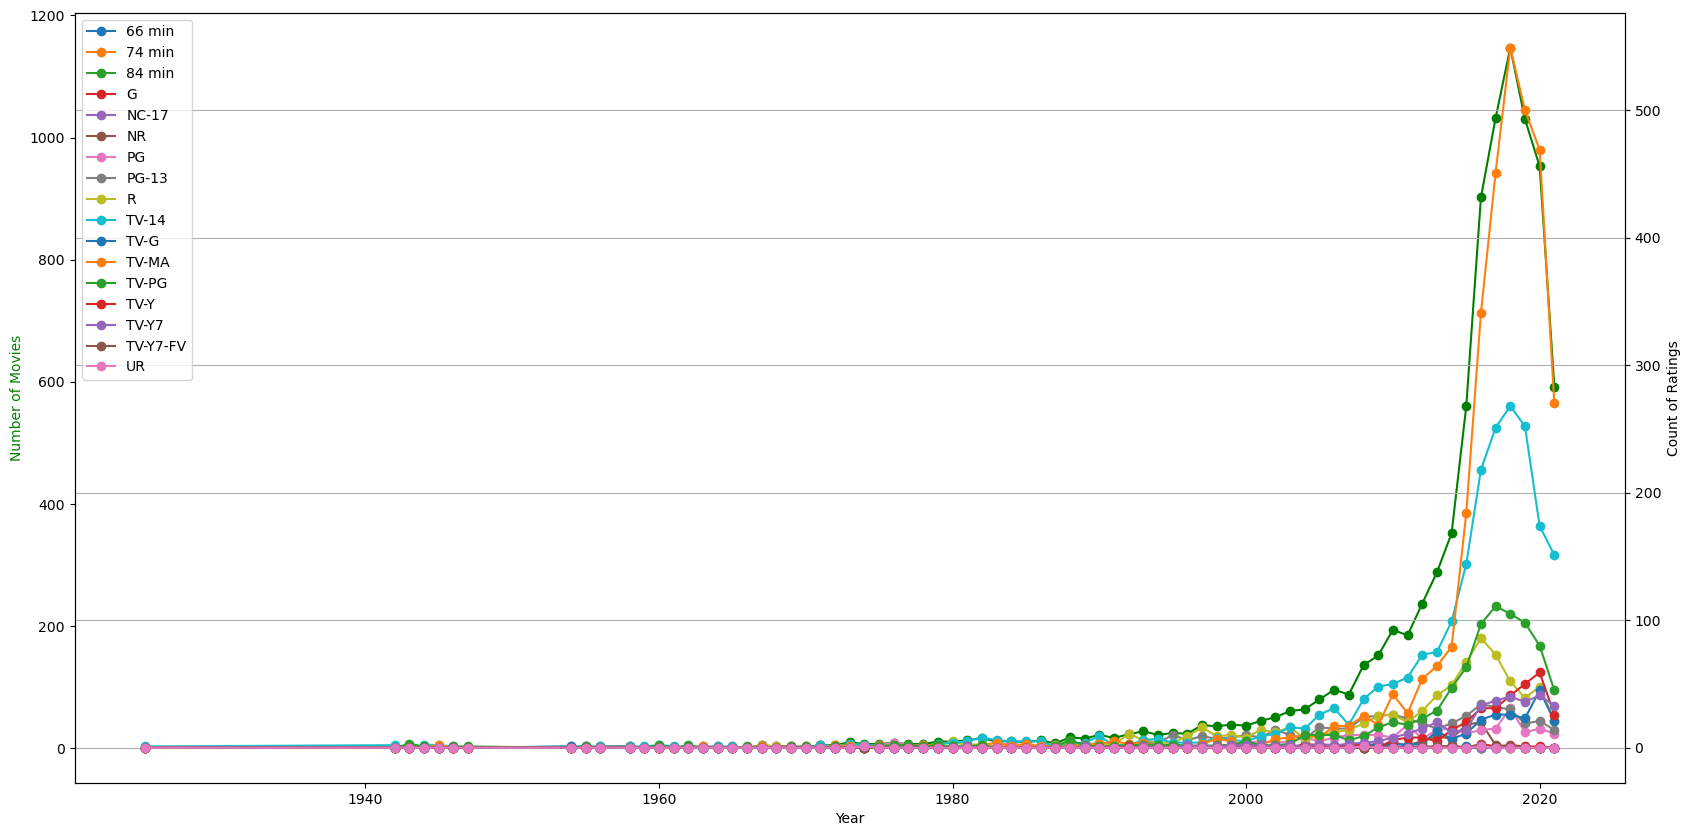

In [280]:
# get the released years by grouping
release_years = netflix_data.groupby("release_year")
ratings = release_years["rating"].value_counts().unstack(fill_value=0)
title = release_years.count()["title"]
release_years = [release_year for release_year, _ in release_years]

# plot the graph
fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(release_years, title, color="g", marker='o', label='Number of Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Movies', color='g')

ax2 = ax1.twinx()
for col in ratings.columns:
    ax2.plot(release_years, ratings[col], marker='o', label=col)
ax2.set_ylabel('Count of Ratings')

plt.xticks(fontsize="small", rotation='vertical')
plt.grid()
plt.legend(loc='upper left')

plt.show()



## Top 40 Directors with Highest TV Show and Movie Counts

In [181]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [309]:
# get the directors which are not null
directors_df = netflix_data[netflix_data.director.notnull()]

In [313]:
# groupby directors and get the movie and tv shows produced by each of them
directors = directors_df.groupby("director")["title"].count()

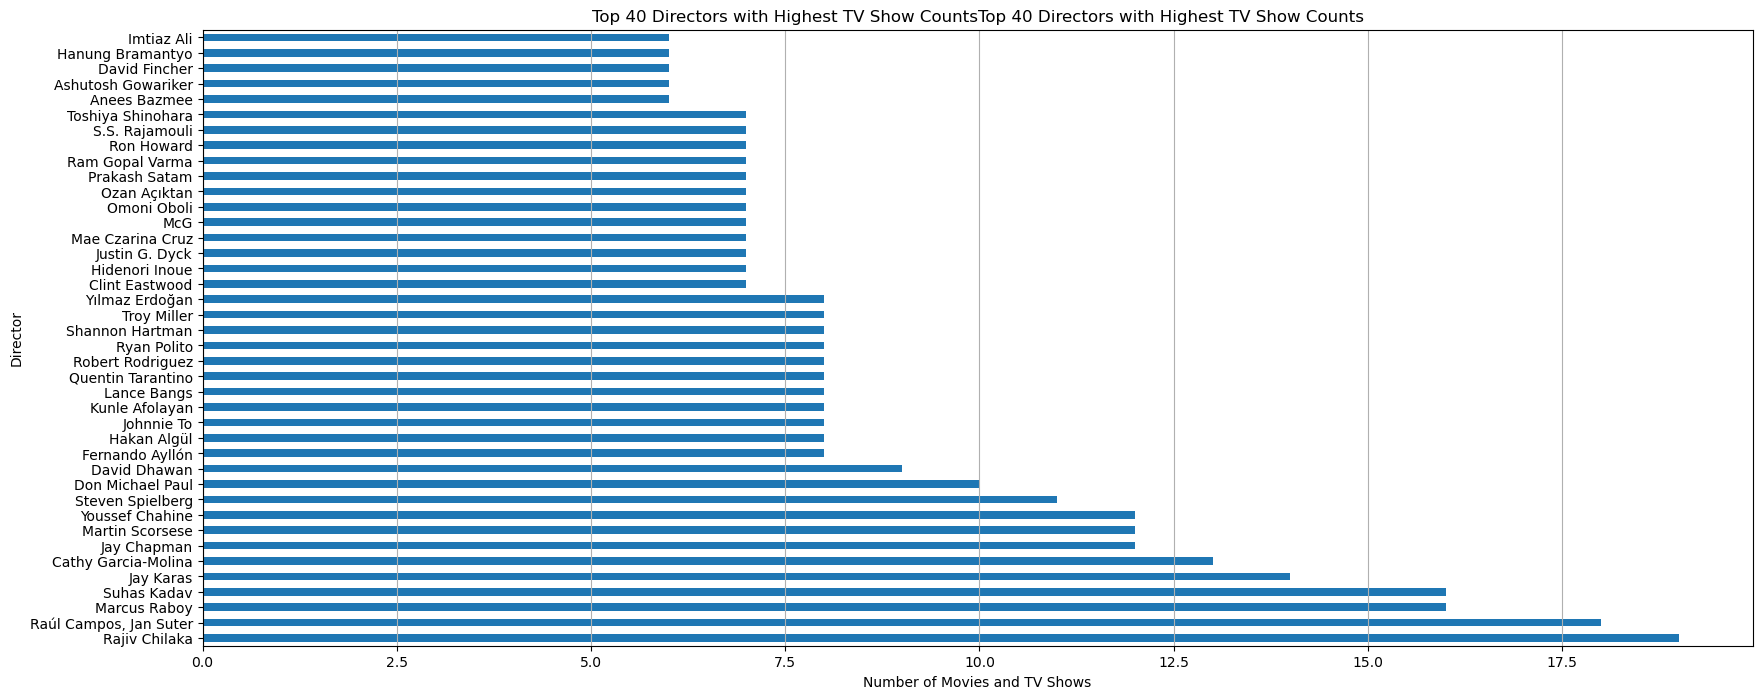

In [311]:
top_directors = directors.nlargest(40)  # Get the top 10 directors by movie count

plt.figure(figsize=(20, 8))
top_directors.plot(kind='barh')
plt.xlabel('Number of Movies and TV Shows')
plt.ylabel('Director')
plt.title('Top 40 Directors with Highest TV Show CountsTop 40 Directors with Highest TV Show Counts')
plt.grid(axis='x')
plt.show()

## Top 40 Directors with Highest TV Show Counts

In [314]:
directors_tv = netflix_data[netflix_data['director'].notnull()]
directors_tv = netflix_data[netflix_data['type'] == "TV Show"]
directors_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


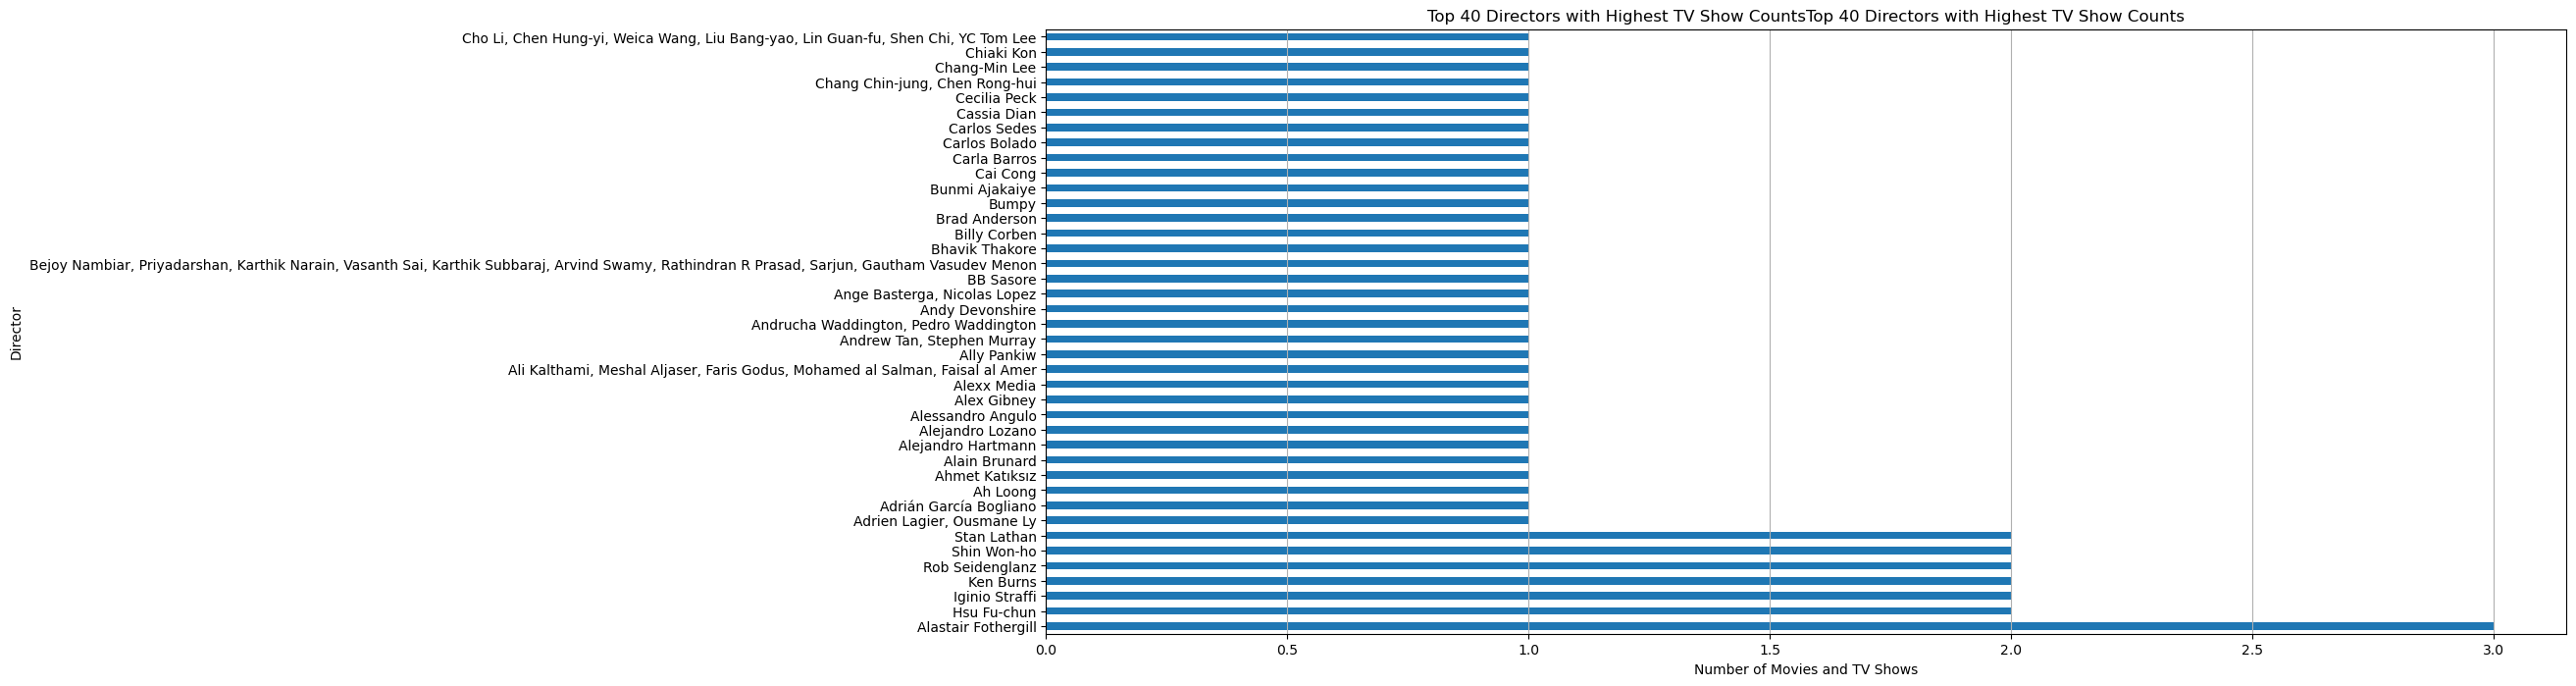

In [315]:
directors_tv = directors_tv.groupby("director")["title"].count()

top_directors = directors_tv.nlargest(40)  # Get the top 10 directors by movie count

plt.figure(figsize=(20, 8))
top_directors.plot(kind='barh')
plt.xlabel('Number of Movies and TV Shows')
plt.ylabel('Director')
plt.title('Top 40 Directors with Highest TV Show CountsTop 40 Directors with Highest TV Show Counts')
plt.grid(axis='x')
plt.show()